In [6]:
import numpy as np
import pandas as pd
from pyne import data, nucname
from pyne.material import Material
from matplotlib import pyplot as plt

%matplotlib inline

## Read in 1 File of Gamma Spectra

In [1]:
results_path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
#detector_dir = 'detector_response/d1_hpge/'
detector_dir = 'detector_response/d2_detective_hpge/'
numcol = 8192
detector_dir = 'detector_response/d5_labr3/'
numcol = 1024
detector_path = results_path + detector_dir

In [2]:
datidx = '1000'
datgz = detector_path + datidx + '.dat.gz'

In [3]:
def get_energy_bins(bindata):
    with open(bindata) as binfile:
        contents = binfile.readlines()
    binlist = []
    for ebin in contents[1].strip().split(' '):
        binlist.append(float(ebin))
    return binlist
energy_bins = get_energy_bins(detector_path + 'energy_bins.dat')

In [7]:
# reads in all 88 spectra in *.dat.gz into a df, and puts energy bins as columns
df = pd.read_csv(datgz, sep=' ', index_col=0, header=None, usecols=range(0, numcol+1), names=['DbIdx']+energy_bins, compression='gzip')

In [8]:
df.tail(1)

,0.150000,3.147227,6.144453,9.141679,12.138910,15.136130,18.133360,21.130580,24.127810,27.125040,...,3039.338000,3042.335000,3045.332000,3048.329000,3051.326000,3054.324000,3057.321000,3060.318000,3063.315000,3066.312000
DbIdx,,,,,,,,,,,,,,,,,,,,,
88087,0.0,0.0,0.876716,92.75221,3220.299,27718.36,93753.88,201189.8,357084.3,501884.6,...,0.000619,0.000605,0.000591,0.000576,0.000541,0.000525,0.000522,0.000515,0.000496,0.000515


## Plot a Test Spectrum

In [9]:
df_idx = 88087

In [10]:
def plot_spectrum(df_idx):
    fig, ax = plt.subplots()
    ax.plot(energy_bins, df.loc[df_idx], linewidth = 2)
    ax.set_title('Spectrum, Idx: ' + str(df_idx), fontsize=12)
    ax.set_xlim(0, 2500)
    #ax.set_ylim(0, 6e5)
    plt.show()

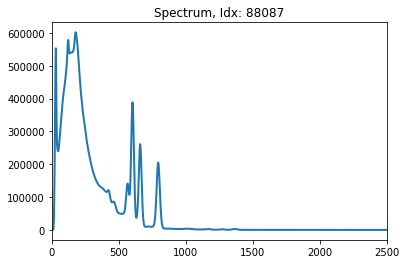

In [11]:
plot_spectrum(df_idx)

## Plot Spectrum with Energy Bin Windows

In [12]:
en_list_pkl = 'idx88087_energy_list_31.pkl' #two current options: 31 or 113
en_list = pd.read_pickle(results_path + 'detector_response/' + en_list_pkl)

In [22]:
en_delta = 12 #energy window in keV

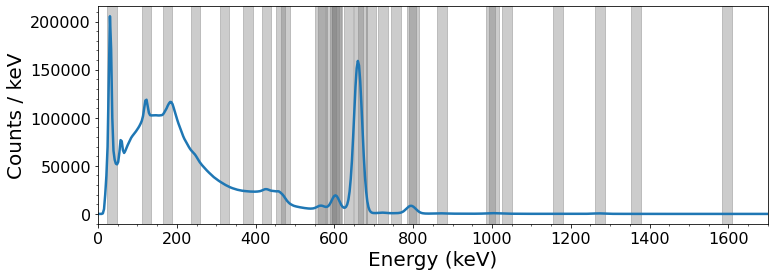

In [29]:
def pres_plot(df_idx):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(energy_bins, df.loc[df_idx], linewidth = 2.5)
    ax.minorticks_on()
    for en in en_list:
        #ax.axvline(x=en, color='r', linewidth=0.5)
        ax.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.4)
    #ax.set_title('Energy', fontsize=14)
    ax.set_xlim(0, 1700)
    #ax.set_ylim(0, 9e6)
    ax.set_xlabel('Energy (keV)', fontsize=20)
    ax.set_ylabel('Counts / keV', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    #fig.savefig('energy_window_example.png', bbox_inches='tight', transparent=True)
pres_plot(88000)

In [25]:
def plot_spectrum_withlines(df_idx):
    fig, ax = plt.subplots(4, figsize=(18, 18))
    fig.suptitle('Spectrum, Idx: ' + str(df_idx), fontsize=18)
    for a in ax:
        a.plot(energy_bins, df.loc[df_idx], linewidth = 3)
        a.minorticks_on()
        for en in en_list:
            a.axvline(x=en, color='r', linewidth=0.5)
            a.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.3)
    ax[0].set_title('Low Energy', fontsize=12)
    ax[0].set_xlim(0, 450)
    ax[0].set_ylim(0, 8e5)
    ax[1].set_title('Med Energy', fontsize=12)
    ax[1].set_xlim(450, 900)
    ax[1].set_ylim(0, 2e5)
    ax[2].set_title('High Energy', fontsize=12)
    ax[2].set_xlim(900, 1700)
    ax[2].set_ylim(0, 5000)
    ax[3].set_title('Highest Energy', fontsize=12)
    ax[3].set_xlim(1700, 3000)
    ax[3].set_ylim(0, 100)
    plt.show()

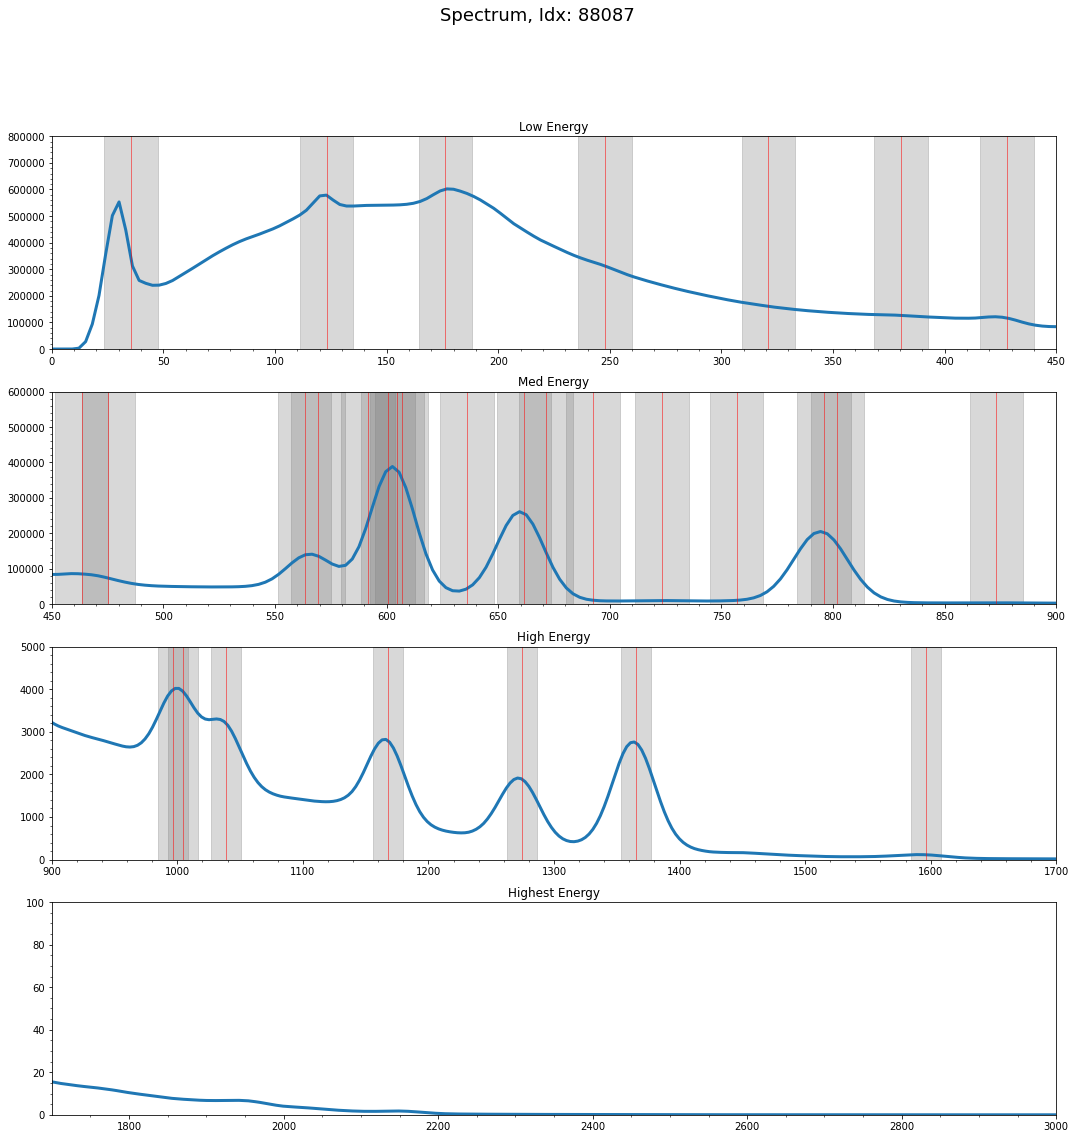

In [23]:
df_idx = 88087
plot_spectrum_withlines(df_idx)

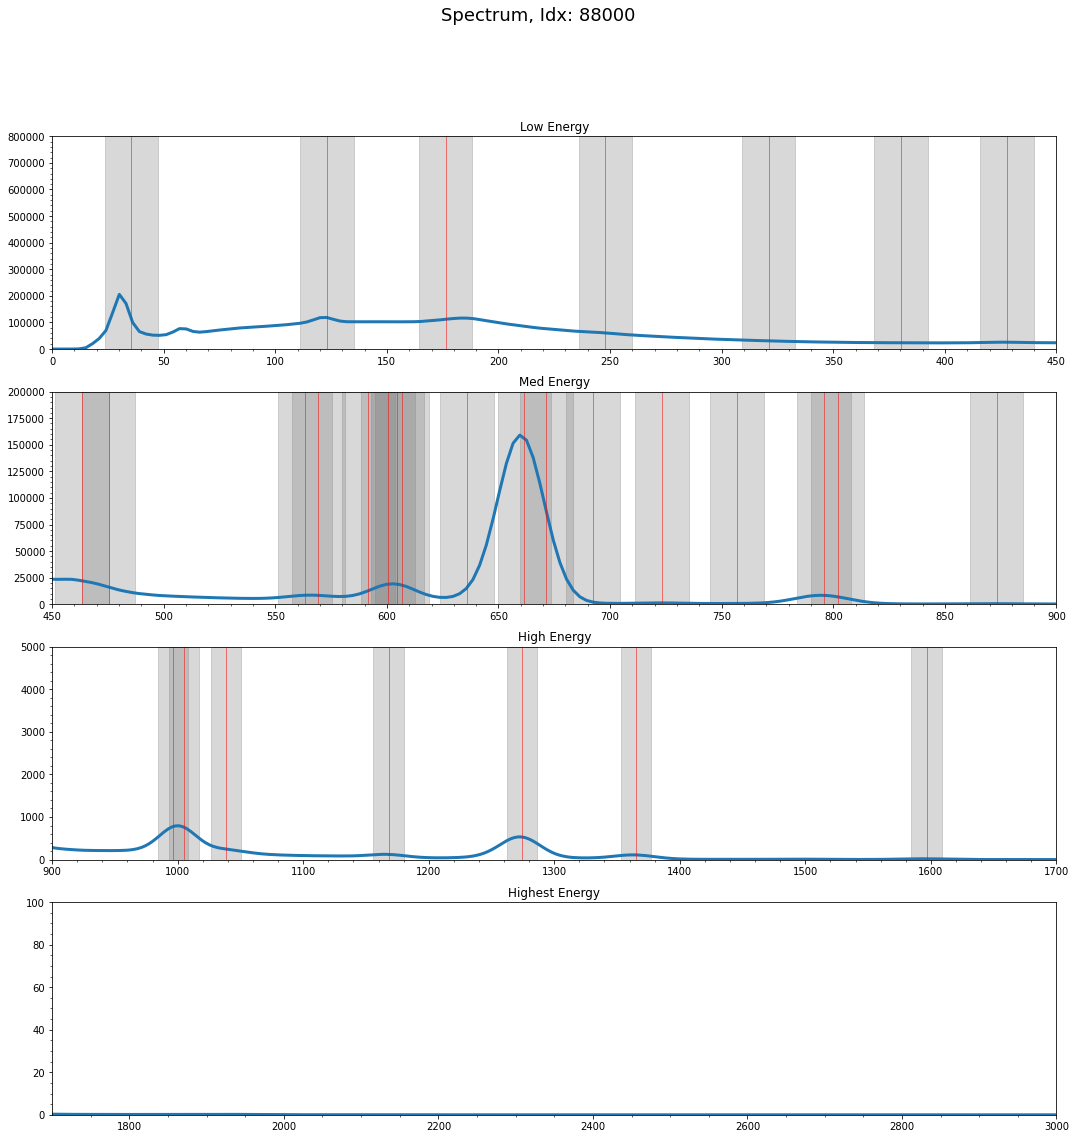

In [26]:
df_idx = 88000
plot_spectrum_withlines(df_idx)